# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Demo-iadftscaleproperty" data-toc-modified-id="Demo-iadftscaleproperty-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Demo iadftscaleproperty</a></div><div class="lev2 toc-item"><a href="#Description" data-toc-modified-id="Description-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Description</a></div><div class="lev2 toc-item"><a href="#Image-read,-ROI-selection-and-display" data-toc-modified-id="Image-read,-ROI-selection-and-display-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Image read, ROI selection and display</a></div><div class="lev2 toc-item"><a href="#DFT-of-the-ROI-image" data-toc-modified-id="DFT-of-the-ROI-image-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>DFT of the ROI image</a></div><div class="lev2 toc-item"><a href="#Image-expansion-(without-interpolation)-and-DFT" data-toc-modified-id="Image-expansion-(without-interpolation)-and-DFT-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Image expansion (without interpolation) and DFT</a></div><div class="lev2 toc-item"><a href="#DFT-of-the-expansion-without-interpolation" data-toc-modified-id="DFT-of-the-expansion-without-interpolation-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>DFT of the expansion without interpolation</a></div><div class="lev2 toc-item"><a href="#Comparing-in-the-frequency-domain." data-toc-modified-id="Comparing-in-the-frequency-domain.-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Comparing in the frequency domain.</a></div><div class="lev2 toc-item"><a href="#Comparing-in-the-spatial-domain." data-toc-modified-id="Comparing-in-the-spatial-domain.-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Comparing in the spatial domain.</a></div>

# Demo iadftscaleproperty

Illustrate the scale property of the Discrete Fourier Transform.

## Description

The scale property of the Discrete Fourier Transform (DFT) is not the same as in the continuous Fourier Transform. In the discrete case the property is the following. If the image is enlarged in such a way that the new pixels have value zero, then its DFT is filled with a replication of the original DFT.
In this demonstration, a small original image is expanded and its DFT is compared to the replicated DFT of the original image. The results should be the same.

## Image read, ROI selection and display

The image is read and a small portion (64x64) is selected.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

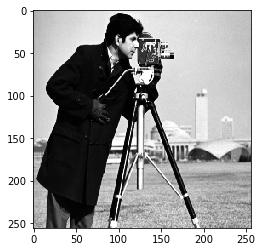

In [2]:
f = mpimg.imread('../data/cameraman.tif')
froi = f[19:19+64,99:99+64] # ROI selection
plt.imshow(f,cmap='gray');

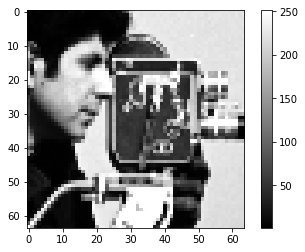

In [3]:
plt.imshow(froi,cmap='gray')
plt.colorbar();

""
original
""
pequena

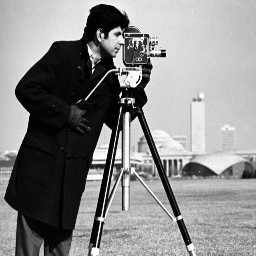
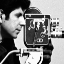

In [15]:
nb = ia.nbshow(2)
nb.nbshow(f,'original',)
nb.nbshow(froi,'pequena')
nb.nbshow()

DFT of the ROI image
--------------------

The DFT of the ROI image is taken and its spectrum is displayed

""
""

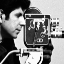

""
""

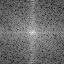

In [16]:
fd = froi.astype(float)
F = np.fft.fft2(fd) # F is the DFT of f
#F = ia.dft(fd)
ia.adshow(froi)
ia.adshow(ia.dftview(F))

Image expansion (without interpolation) and DFT
-----------------------------------------------

The image is expanded by 4, but filling the new pixels with 0

""
""

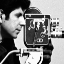

""
""

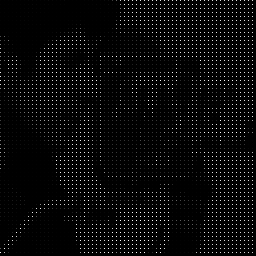

8.0191192627 128.305908203


In [23]:
H,W = froi.shape
fx4 = np.zeros((4*H,4*W),'uint8')  # size is 4 times larger
fx4[::4,::4] = froi                     # filling the expanded image
ia.adshow(froi)
ia.adshow(fx4)
print(fx4.mean(),froi.mean())

DFT of the expansion without interpolation
------------------------------------------

the resulting DFT is a periodical replication of the original DFT.

""
""

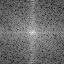

""
""

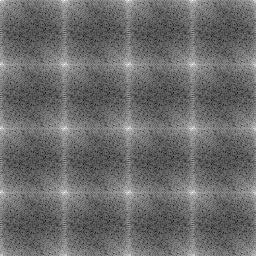

In [25]:
fdx4 = fx4.astype(float)
Fx4 = np.fft.fft2(fdx4)   # Fx4 is the DFT of fx4 (expanded f)
ia.adshow(ia.dftview(F))
ia.adshow(ia.dftview(Fx4))

Comparing in the frequency domain.
----------------------------------

Alternatively, the original DFT (F) is replicated by 4 in each direction and compared with the DFT of the expanded image. For quantitative comparison, both the sum of the absolute errors of all pixels is computed and displayed.

""
""

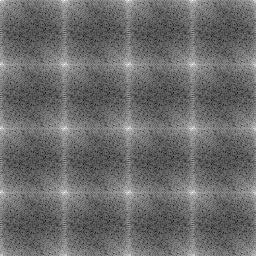

0.0


In [26]:
aux = np.concatenate((F,F,F,F))
FFx4 = np.concatenate((aux,aux,aux,aux), 1)   # replicate the DFT of f
ia.adshow(ia.dftview(FFx4))
diff = abs(FFx4 - Fx4).sum()                  # compare the replicated DFT with DFT of expanded f
print(diff) # print the error signal power


Comparing in the spatial domain.
--------------------------------

-4.03896783473e-28


""
""

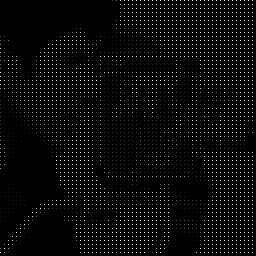

0.0


In [27]:
ffdx4 = np.fft.ifft2(FFx4)
fimag = ffdx4.imag
print(fimag.sum())
ffdx4 = np.floor(0.5 + ffdx4.real) # round
ia.adshow(ia.normalize(ffdx4.astype('int32')))
error = abs(fdx4 - ffdx4).sum()
print(error)